# Line broadening

In [19]:
import numpy as np
import sympy
from sympy import *
from sympy.stats import *
print("Using sympy version", sympy.__version__)
init_session(quiet=True)
I0, lam = symbols(r'I_0 \lambda')

Using sympy version 1.3



In [20]:
%matplotlib inline

In [21]:
%config InlineBackend.figure_format = 'retina'

In [22]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["figure.figsize"] = 12, 4
rcParams["font.size"] = 16
rcParams["text.usetex"] = False
rcParams["font.family"] = ["sans-serif"]
rcParams["font.sans-serif"] = ["cmss10"]
rcParams["axes.unicode_minus"] = False

In [23]:
def P(n, k):
    """
    Return the incomplete Bell polynomial needed to compute
    D/Dbeta.
    
    """
    if k > n:
        return 0
    series = [(-1) ** j * factorial(j) for j in range(1, n - k + 2)]
    return bell(n, k, series)

In [206]:
def S(lam, mu=0.5, sigma=0.001, beta=0, N=10):
    """
    Return the integrated spectrum.
    
    """
    # The rest frame line profile
    I0 = 1 - 0.1 * exp(-0.5 * (lam - mu) ** 2 / sigma ** 2)
    
    # The rest frame integrated spectrum
    S0 = np.pi * I0
    
    # The higher order terms
    SN = 0
    if beta != 0:
        for n in range(2, N + 1, 2):
            sum_k = 0
            for k in range(1, n + 1):
                sum_k += lam ** k * P(n, k) * diff(I0, lam, k)
            beta_term = np.sqrt(np.pi) * beta ** n * gamma(Rational(n, 2) + Rational(1, 2)) / gamma(Rational(n, 2) + 2)
            SN += beta_term * sum_k
    
    # Normalize and return
    return (S0 + SN) / np.pi

In [207]:
def I(lam, mu=0.5, sigma=0.001, beta=0, N=10):
    """
    Return the shifted spectrum.
    
    """
    # The rest frame line profile
    I0 = 1 - 0.1 * exp(-0.5 * (lam - mu) ** 2 / sigma ** 2)
    if beta == 0:
        return I0
    
    # The higher order terms
    IN = 0
    for n in range(1, N + 1):
        sum_k = 0
        for k in range(1, n + 1):
            sum_k += lam ** k * P(n, k) * diff(I0, lam, k)
        beta_term = beta ** n
        IN += beta_term * sum_k
    
    return I0 + IN

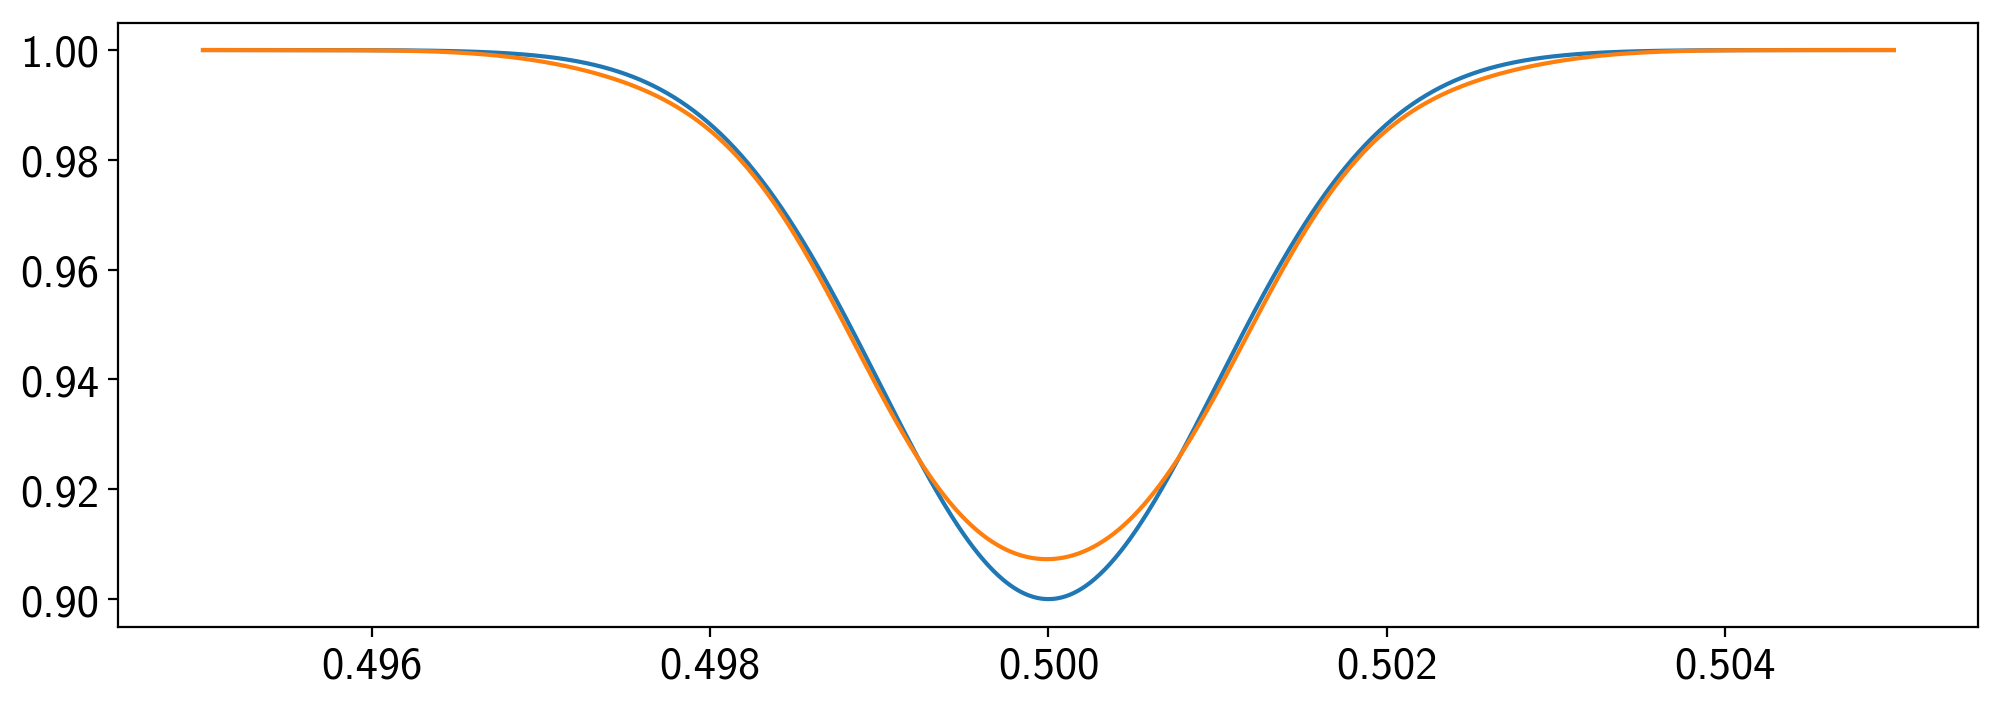

In [214]:
# Wavelength array
lam_arr = np.linspace(0.495, 0.505, 1000)

# Unshifted
plt.plot(lam_arr, lambdify(lam, S(lam, beta=0), "numpy")(lam_arr));

# Shifted
plt.plot(lam_arr, lambdify(lam, S(lam, beta=1e-3), "numpy")(lam_arr));